# Medical Cost Personal Insurance Project

In [667]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
import warnings
warnings.filterwarnings('ignore')

In [668]:
data = pd.read_csv('medical_cost_insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [669]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [670]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [671]:
data.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [672]:
data.shape

(1338, 7)

In [673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [674]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [675]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [676]:
data['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [677]:
data['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

## Convert Object type of data into int

In [679]:
replace_data = {'sex': {'male' : 0 , 'female' : 1},'smoker': {'no': 0 , 'yes' : 1},'region' : {'northwest':0, 'northeast':1,'southeast':2,'southwest':3}}
df = data.copy() # Copy the data into df and replace into the df var
df.replace(replace_data, inplace=True)

In [680]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,3,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,0,21984.47061
4,32,0,28.880,0,0,0,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0,10600.54830
1334,18,1,31.920,0,0,1,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,3,2007.94500


In [681]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


### Statistical measures of Data

In [683]:
df.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.494768,30.663397,1.094918,0.204783,1.514948,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.105572,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,0.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


### Distribution Of Data

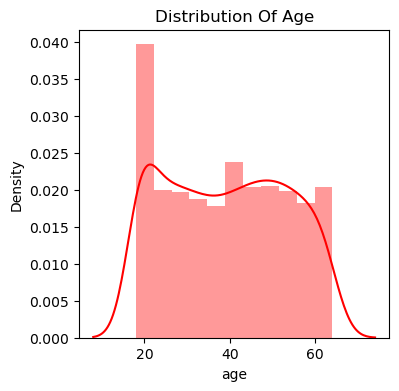

In [685]:
plt.figure(figsize=(4,4))
sns.distplot(df['age'],color='red')
plt.title('Distribution Of Age')
plt.show()

most number of people are belong to 20-24 age

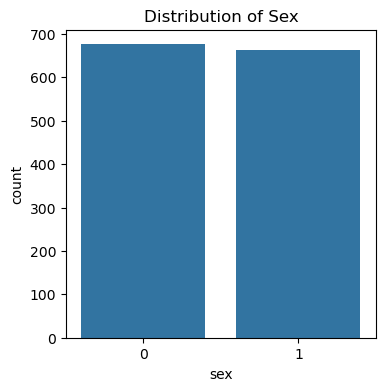

In [687]:
plt.figure(figsize=(4,4))
sns.countplot(x='sex',data=df)
plt.title('Distribution of Sex')
plt.show()

In [688]:
data['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

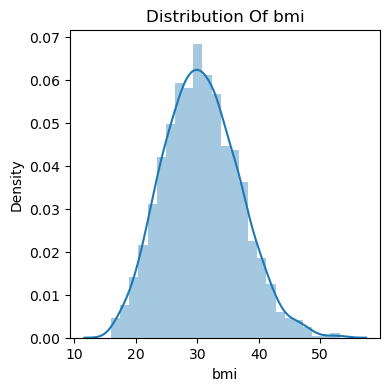

In [689]:
plt.figure(figsize=(4,4))
sns.distplot(df['bmi'])
plt.title('Distribution Of bmi')
plt.show()

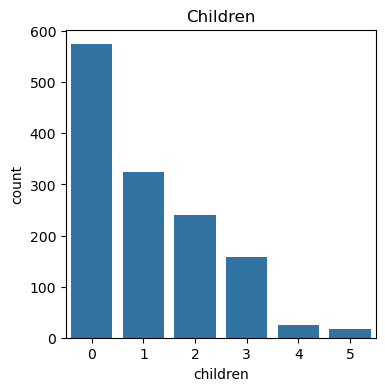

In [690]:
plt.figure(figsize=(4,4))
sns.countplot(x='children',data=df)
plt.title('Children')
plt.show()

In [691]:
df['children'].value_counts()

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

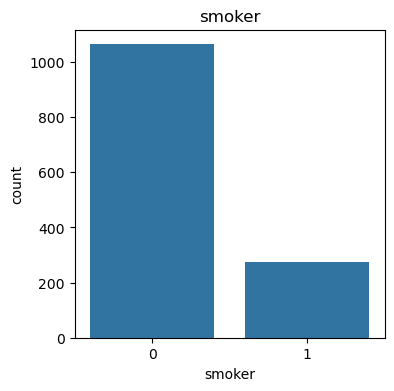

In [692]:
plt.figure(figsize=(4,4))
sns.countplot(x='smoker',data=df)
plt.title('smoker')
plt.show()

more number of people are not smoker

In [694]:
df['smoker'].value_counts()

smoker
0    1064
1     274
Name: count, dtype: int64

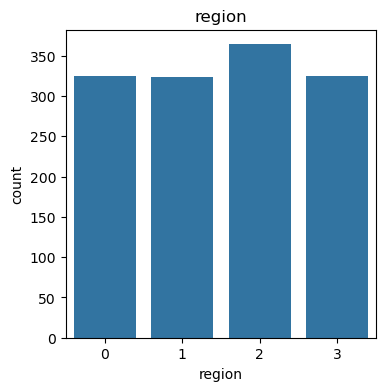

In [695]:
plt.figure(figsize=(4,4))
sns.countplot(x='region',data=df)
plt.title('region')
plt.show()

In [696]:
df['region'].value_counts() 
# 'northwest':0, 'northeast':1,'southeast':2,'southwest':3

region
2    364
3    325
0    325
1    324
Name: count, dtype: int64

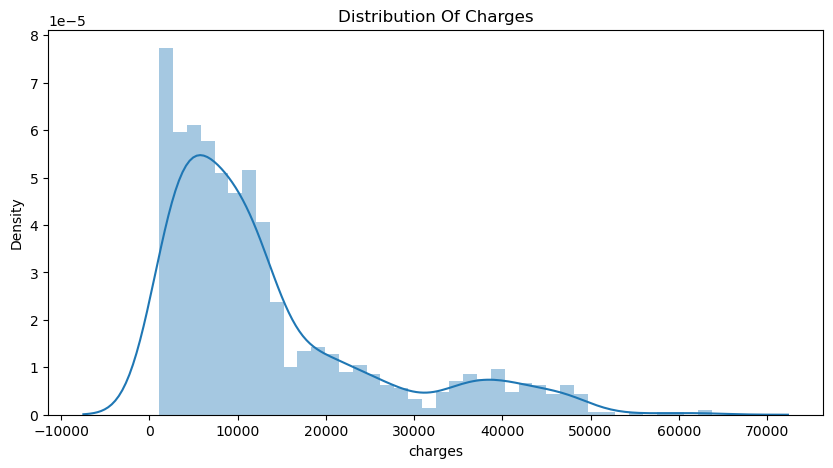

In [697]:
plt.figure(figsize=(10,5))
sns.distplot(df['charges'],bins=40,kde=True)
plt.title('Distribution Of Charges')
plt.show()

In [698]:
df.corr()

,age,sex,bmi,children,smoker,region,charges
age,1.000000,0.020856,0.109272,0.042469,-0.025019,0.003243,0.299008
sex,0.020856,1.000000,-0.046371,-0.017163,-0.076185,-0.007974,-0.057292
bmi,0.109272,-0.046371,1.000000,0.012759,0.003750,0.156686,0.198341
children,0.042469,-0.017163,0.012759,1.000000,0.007673,-0.001907,0.067998
smoker,-0.025019,-0.076185,0.003750,0.007673,1.000000,0.013246,0.787251
region,0.003243,-0.007974,0.156686,-0.001907,0.013246,1.000000,0.011741
charges,0.299008,-0.057292,0.198341,0.067998,0.787251,0.011741,1.000000


<Axes: >

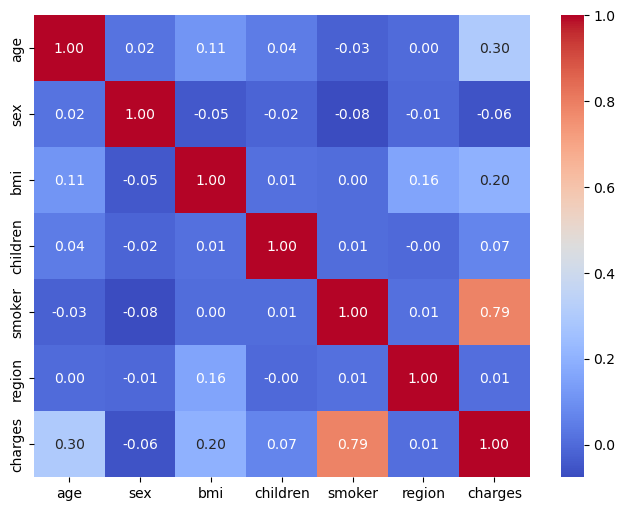

In [699]:
plt.figure(figsize = (8,6))
sns.heatmap(df.corr(),annot=True,cmap = 'coolwarm',fmt='0.2f')

we can see here that sex, children, region do not affect the charges. because they have less correlation.

Smoker, BMI, Age factors are affect to the charges

## Splitting the DataSet

In [702]:
x = df.drop(columns='charges',axis=1)
y = df['charges']

In [703]:
x

,age,sex,bmi,children,smoker,region
0,19,1,27.900,0,1,3
1,18,0,33.770,1,0,2
2,28,0,33.000,3,0,2
3,33,0,22.705,0,0,0
4,32,0,28.880,0,0,0
...,...,...,...,...,...,...
1333,50,0,30.970,3,0,0
1334,18,1,31.920,0,0,1
1335,18,1,36.850,0,0,2
1336,21,1,25.800,0,0,3


In [704]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [705]:
from sklearn.preprocessing import StandardScaler

In [706]:
scale=StandardScaler()
scale

StandardScaler()

In [707]:
x= pd.DataFrame(scale.fit_transform(x))
x

,0,1,2,3,4,5
0,-1.438764,1.010519,-0.453320,-0.908614,1.970587,1.343746
1,-1.509965,-0.989591,0.509621,-0.078767,-0.507463,0.438898
2,-0.797954,-0.989591,0.383307,1.580926,-0.507463,0.438898
3,-0.441948,-0.989591,-1.305531,-0.908614,-0.507463,-1.370796
4,-0.513149,-0.989591,-0.292556,-0.908614,-0.507463,-1.370796
...,...,...,...,...,...,...
1333,0.768473,-0.989591,0.050297,1.580926,-0.507463,-1.370796
1334,-1.509965,1.010519,0.206139,-0.908614,-0.507463,-0.465949
1335,-1.509965,1.010519,1.014878,-0.908614,-0.507463,0.438898
1336,-1.296362,1.010519,-0.797813,-0.908614,-0.507463,1.343746


## Training and Test the model

In [709]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Lasso,Ridge

In [710]:
# Finding best Ran. state

In [711]:
maxAccu = 0
maxRs = 0
for i in range(1,250):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=i)
    lr = LinearRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=r2_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRs = i
print("Max r2 score is ",maxAccu,"on Random State ",maxRs)

Max r2 score is  0.8162453192651768 on Random State  215


In [712]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=maxRs)

In [713]:
lr = LinearRegression()

lr.fit(x_train,y_train)
predlr=lr.predict(x_test)
pred_train=lr.predict(x_train)
print(lr)
print('R2_Score: ',r2_score(y_test,predlr))
print('R2 Score on Training Data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolutr Error: ',mean_absolute_error(y_test,predlr))
print('Mean Squared Error: ',mean_squared_error(y_test,predlr))
print('Root Mean squared Error: ',np.sqrt(mean_squared_error(y_test,predlr)))

LinearRegression()
R2_Score:  0.8162453192651768
R2 Score on Training Data:  73.05481500519623
Mean Absolutr Error:  4114.458617072186
Mean Squared Error:  30323957.166454878
Root Mean squared Error:  5506.719274346104


In [714]:
gbr = GradientBoostingRegressor()
gbr,rf,dtr,la,r

gbr.fit(x_train,y_train)
predgbr=gbr.predict(x_test)
pred_train=gbr.predict(x_train)
print(gbr)
print('R2_Score: ',r2_score(y_test,predgbr))
print('R2 Score on Training Data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolutr Error: ',mean_absolute_error(y_test,predgbr))
print('Mean Squared Error: ',mean_squared_error(y_test,predgbr))
print('Root Mean squared Error: ',np.sqrt(mean_squared_error(y_test,predgbr)))

GradientBoostingRegressor()
R2_Score:  0.9053744612798172
R2 Score on Training Data:  89.3792818412531
Mean Absolutr Error:  2230.0752410940618
Mean Squared Error:  15615497.638095042
Root Mean squared Error:  3951.644928140058


In [715]:
rf = RandomForestRegressor()

rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
pred_train=rf.predict(x_train)
print(rf)
print('R2_Score: ',r2_score(y_test,predrf))
print('R2 Score on Training Data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolutr Error: ',mean_absolute_error(y_test,predrf))
print('Mean Squared Error: ',mean_squared_error(y_test,predrf))
print('Root Mean squared Error: ',np.sqrt(mean_squared_error(y_test,predrf)))

RandomForestRegressor()
R2_Score:  0.8880243344256007
R2 Score on Training Data:  97.43191886624115
Mean Absolutr Error:  2473.976017353271
Mean Squared Error:  18478687.307364322
Root Mean squared Error:  4298.684369358179


In [716]:
dtr = DecisionTreeRegressor()

dtr.fit(x_train,y_train)
predtr=dtr.predict(x_test)
pred_train=dtr.predict(x_train)
print(dtr)
print('R2_Score: ',r2_score(y_test,predtr))
print('R2 Score on Training Data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolutr Error: ',mean_absolute_error(y_test,predtr))
print('Mean Squared Error: ',mean_squared_error(y_test,predtr))
print('Root Mean squared Error: ',np.sqrt(mean_squared_error(y_test,predtr)))

DecisionTreeRegressor()
R2_Score:  0.7858133324518439
R2 Score on Training Data:  99.87921577327153
Mean Absolutr Error:  2824.4016053544774
Mean Squared Error:  35345969.45439951
Root Mean squared Error:  5945.2476360871215


In [717]:
la = Lasso()

la.fit(x_train,y_train)
pred_la=la.predict(x_test)
pred_train=la.predict(x_train)
print(la)
print('R2_Score: ',r2_score(y_test,pred_la))
print('R2 Score on Training Data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolutr Error: ',mean_absolute_error(y_test,pred_la))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_la))
print('Root Mean squared Error: ',np.sqrt(mean_squared_error(y_test,pred_la)))

Lasso()
R2_Score:  0.8162451658996964
R2 Score on Training Data:  73.05481051797096
Mean Absolutr Error:  4114.510629141585
Mean Squared Error:  30323982.475460563
Root Mean squared Error:  5506.721572356874


In [718]:
r = Ridge()

r.fit(x_train,y_train)
pred_r=r.predict(x_test)
pred_train=r.predict(x_train)
print(r)
print('R2_Score: ',r2_score(y_test,pred_r))
print('R2 Score on Training Data: ',r2_score(y_train,pred_train)*100)
print('Mean Absolutr Error: ',mean_absolute_error(y_test,pred_r))
print('Mean Squared Error: ',mean_squared_error(y_test,pred_r))
print('Root Mean squared Error: ',np.sqrt(mean_squared_error(y_test,pred_r)))

Ridge()
R2_Score:  0.8161785524195642
R2 Score on Training Data:  73.05474559958563
Mean Absolutr Error:  4116.449455798798
Mean Squared Error:  30334975.307371896
Root Mean squared Error:  5507.719610453304


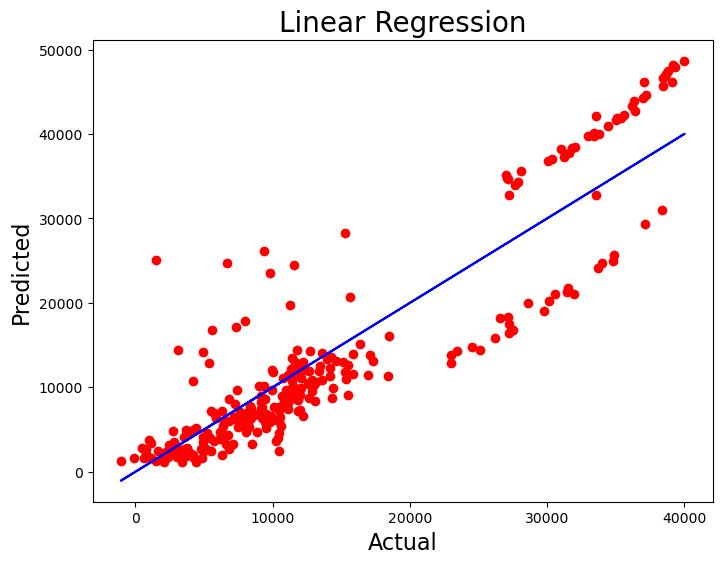

In [719]:
plt.figure(figsize=(8,6))
plt.scatter(x=predlr,y=y_test,color='r')
plt.plot(predlr,predlr,color='b')
plt.xlabel("Actual",fontsize=16)
plt.ylabel("Predicted",fontsize=16)
plt.title("Linear Regression", fontsize=20)
plt.show()

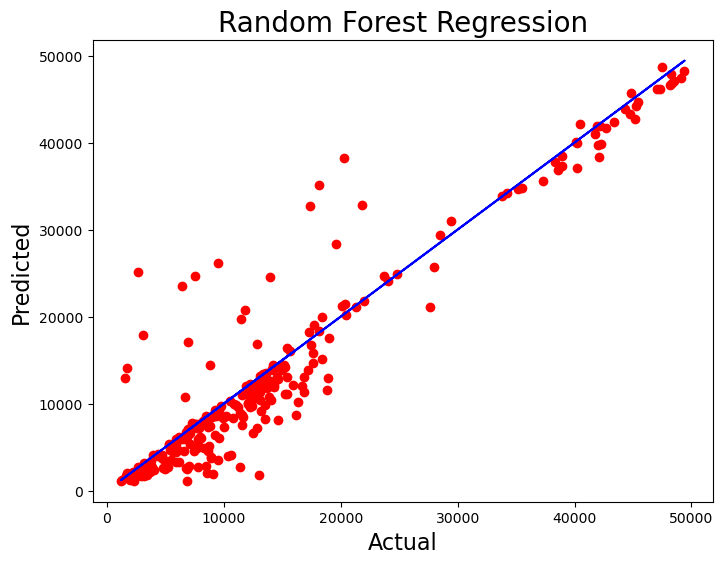

In [720]:
plt.figure(figsize=(8,6))
plt.scatter(x=predrf,y=y_test,color='r')
plt.plot(predrf,predrf,color='b')
plt.xlabel("Actual",fontsize=16)
plt.ylabel("Predicted",fontsize=16)
plt.title("Random Forest Regression", fontsize=20)
plt.show()

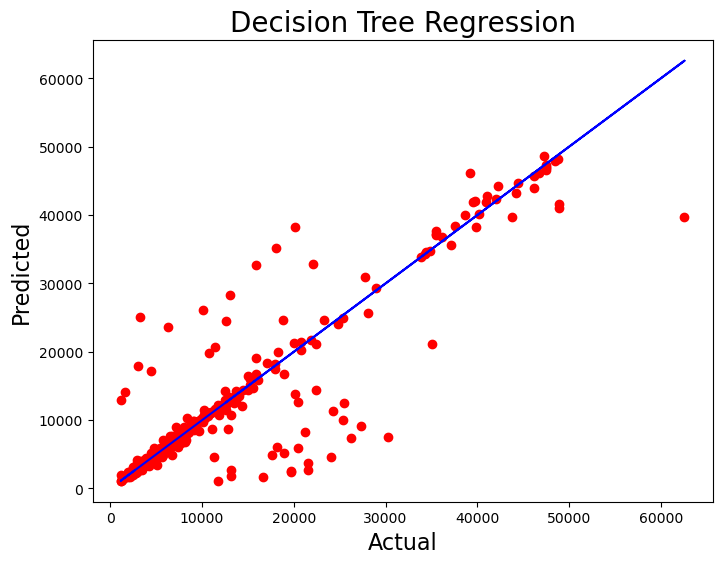

In [721]:
plt.figure(figsize=(8,6))
plt.scatter(x=predtr,y=y_test,color='r')
plt.plot(predtr,predtr,color='b')
plt.xlabel("Actual",fontsize=16)
plt.ylabel("Predicted",fontsize=16)
plt.title("Decision Tree Regression", fontsize=20)
plt.show()

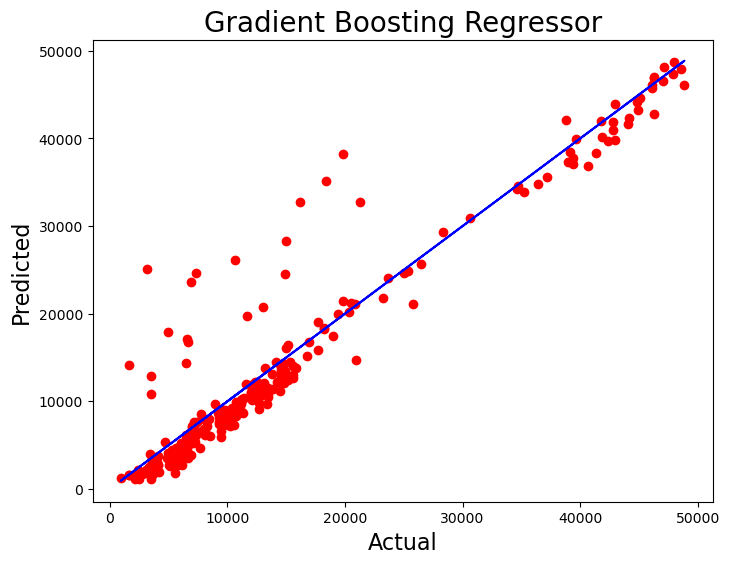

In [722]:
plt.figure(figsize=(8,6))
plt.scatter(x=predgbr,y=y_test,color='r')
plt.plot(predgbr,predgbr,color='b')
plt.xlabel("Actual",fontsize=16)
plt.ylabel("Predicted",fontsize=16)
plt.title("Gradient Boosting Regressor", fontsize=20)
plt.show()

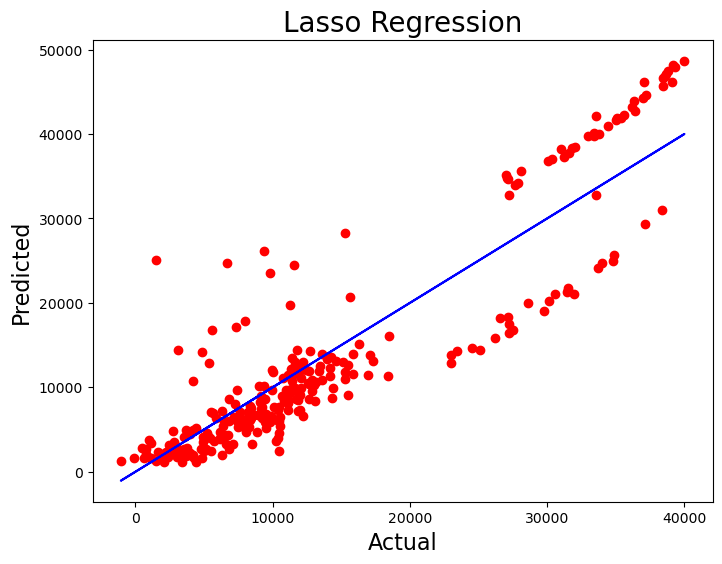

In [723]:
plt.figure(figsize=(8,6))
plt.scatter(x=pred_la,y=y_test,color='r')
plt.plot(pred_la,pred_la,color='b')
plt.xlabel("Actual",fontsize=16)
plt.ylabel("Predicted",fontsize=16)
plt.title("Lasso Regression", fontsize=20)
plt.show()

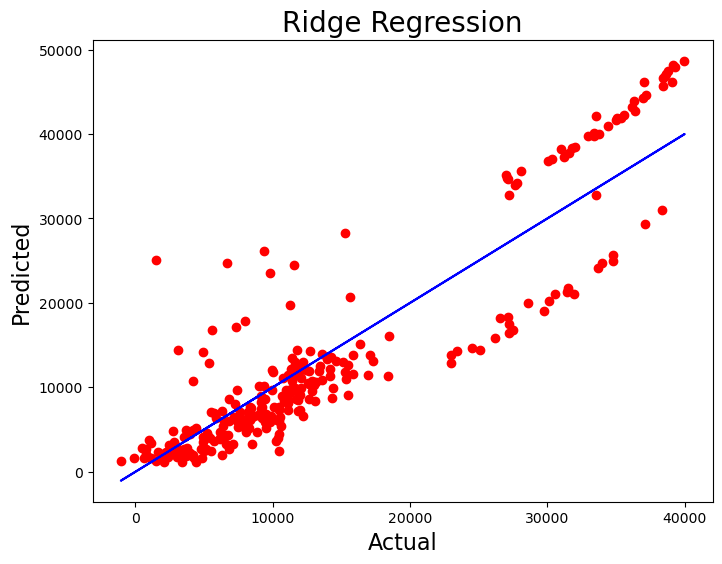

In [724]:
plt.figure(figsize=(8,6))
plt.scatter(x=pred_r,y=y_test,color='r')
plt.plot(pred_r,pred_r,color='b')
plt.xlabel("Actual",fontsize=16)
plt.ylabel("Predicted",fontsize=16)
plt.title("Ridge Regression", fontsize=20)
plt.show()

#### Cross Validation

In [726]:
from sklearn.model_selection import cross_val_score

In [727]:
score1 = cross_val_score(lr,x,y)
print(score1)
print(score1.mean())
print('Diff. between R2 score & CV score is -', r2_score(y_test,predlr)-score1.mean()*100)

[0.76161607 0.70849126 0.77673439 0.7327692  0.75584424]
0.7470910325728581
Diff. between R2 score & CV score is - -73.89285793802064


In [728]:
score2 = cross_val_score(gbr,x,y)
print(score2)
print(score2.mean())
print('Diff. between R2 score & CV score is -', r2_score(y_test,predgbr)-score2.mean()*100)

[0.87418702 0.79631671 0.89302407 0.85165066 0.85940194]
0.8549160772190427
Diff. between R2 score & CV score is - -84.58623326062445


In [729]:
score3 = cross_val_score(dtr,x,y)
print(score3)
print(score3.mean())
print('Diff. between R2 score & CV score is -', r2_score(y_test,predtr)-score3.mean()*100)

[0.73999195 0.64934517 0.71692333 0.73248959 0.68736336]
0.7052226796471441
Diff. between R2 score & CV score is - -69.73645463226258


In [730]:
score4 = cross_val_score(la,x,y)
print(score4)
print(score4.mean())
print('Diff. between R2 score & CV score is -', r2_score(y_test,pred_la)-score4.mean()*100)

[0.76162078 0.70852282 0.77671894 0.73276847 0.75584882]
0.7470959666121368
Diff. between R2 score & CV score is - -73.89335149531398


In [731]:
score5 = cross_val_score(r,x,y)
print(score5)
print(score5.mean())
print('Diff. between R2 score & CV score is -', r2_score(y_test,pred_r)-score5.mean()*100)

[0.76162513 0.70859473 0.77661828 0.7328242  0.7558159 ]
0.7470956477289812
Diff. between R2 score & CV score is - -73.89338622047856


In [732]:
score6 = cross_val_score(rf,x,y)
print(score6)
print(score6.mean())
print('Diff. between R2 score & CV score is -', r2_score(y_test,predrf)-score6.mean()*100)

[0.85346414 0.78176169 0.87125626 0.82898452 0.85287206]
0.8376677316414252
Diff. between R2 score & CV score is - -82.87874882971693


Decision Tree Regressor our best model

#### Build a pred System here

In [836]:
input_data = (18,1,27.900,0,0,1)
input_data_as_numpy_array = np.asarray(input_data)#Change input data into numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1) #reshape Array
prediction = dtr.predict(input_data_reshaped)
print(prediction)

[14418.2804]
